# Outlier Detection and Removal using Standard Deviation and Z-score

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('height2.csv')
data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
data.shape

(10000, 2)

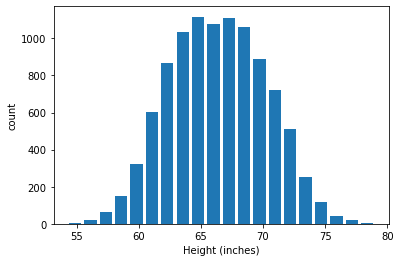

In [16]:
# Plot histogram for height column.
plt.hist(data['height'], bins =20, rwidth = 0.8)
plt.xlabel('Height (inches)')
plt.ylabel('count')
plt.show()

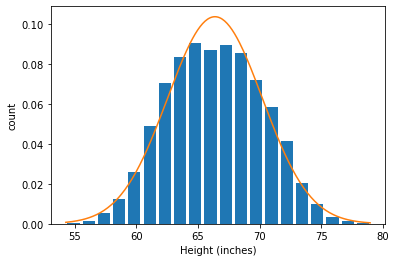

In [23]:
# Plot Normal/Bell curve along with histogram for our dataset
from scipy.stats import norm
plt.hist(data['height'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

rng = np.arange(data['height'].min(), data['height'].max(),0.1)
plt.plot(rng, norm.pdf(rng, data['height'].mean(), data['height'].std()))
plt.show()

In [24]:
# Mean and standard deviation of height
print('Mean :', data['height'].mean())
print('Standard deviation :', data['height'].std())

Mean : 66.3675597548656
Standard deviation : 3.847528120795573


### 1. Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [25]:
upper_limit = data['height'].mean() + 3*data['height'].std()
upper_limit

77.91014411725232

In [26]:
lower_limit = data['height'].mean() - 3*data['height'].std()
lower_limit

54.824975392478876

In [27]:
# Outliers that are beyond 3 standard deviation
data[(data['height'] < lower_limit) | (data['height'] > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

In [30]:
# new dataframe without outliers
new_data = data[(data['height'] < upper_limit) & (data['height'] > lower_limit)]
new_data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [31]:
new_data.shape

(9993, 2)

### 2. Outlier detetion and removal using Z- score

- **Z score is a way to achieve same thing that we did above in part (1)**
- **Z score indicates how many standard deviation away a data point is.**


- For example in our case mean is 66.37 and standard deviation is 3.84.
- If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

<img align='left' height="400" width="300" src="zscore.png" />

In [37]:
data['Z_score'] = (data['height'] - data['height'].mean())/data['height'].std()
data.head()

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [38]:
data[data['Z_score'] >3 ]

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [40]:
data[data['Z_score'] < -3 ]

,gender,height,Z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [42]:
# dataframe of all outliers
data[(data['Z_score']<-3) | (data['Z_score']>3)]

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [45]:
# Dataframe after remving all outliers
new_df = data[~((data['Z_score']<-3) | (data['Z_score']>3))]
new_df

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [46]:
new_df.shape

(9993, 3)